In [103]:
import numpy as np
import cv2
from PIL import Image

import LSB_Steganography_master.LSBSteg as lsbsteg

In [239]:
#imgpath_original = "img/Kiprensky_Pushkin_orig.jpg"
imgpath_original = "img/Kiprensky_Pushkin_orig2.jpg"
imgpath_encoded = "img/Kiprensky_Pushkin_encoded.png"
messagepath = 'Eugene_Onegin_orig.txt'

#### Загружаем текстовое сообщение для упаковки

In [240]:
with open(messagepath, 'r') as f:
    message = f.read()
    message_short = message[1211:1610]
    
print(message_short)

		«Мой дядя самых честных правил,
		Когда не в шутку занемог,
		Он уважать себя заставил
		И лучше выдумать не мог.
		Его пример другим наука;
		Но, боже мой, какая скука
		С больным сидеть и день и ночь,
		Не отходя ни шагу прочь!
		Какое низкое коварство
		Полуживого забавлять,
		Ему подушки поправлять,
		Печально подносить лекарство,
		Вздыхать и думать про себя:
		Когда же черт возьмет тебя!»


In [241]:
len(message)

185597

#### Упаковываем сообщение в картинку

In [242]:
img_original = cv2.imread(imgpath_original)
steg = lsbsteg.LSBSteg(img_original.copy())
               
img_encoded = steg.encode_binary(bytes(message, 'utf-8'))
#img_encoded = steg.encode_binary(bytes(message_short, 'utf-8'))
cv2.imwrite(imgpath_encoded, img_encoded)


True

In [243]:
np.argwhere(np.abs(img_encoded - img_original) > 0)

array([[  0,   0,   0],
       [  0,   0,   1],
       [  0,   1,   0],
       ...,
       [474, 599,   0],
       [474, 599,   1],
       [474, 599,   2]], dtype=int64)

#### Распаковываем сообщение из картинки

In [244]:
img_encoded = cv2.imread(imgpath_encoded)
steg = lsbsteg.LSBSteg(img_encoded)
#message_decoded = steg.decode_text()
message_decoded = str(steg.decode_binary(), 'utf-8')
print("Message decoded:", message_decoded)

Message decoded: Александр Сергеевич Пушкин

Евгений Онегин

Роман в стихах


Pe€tri de vanite€ il avait encore plus de cette espe`ce d’orgueil qui fait avouer avec la me^me indiffe€rence les bonnes comme les mauvaises actions, suite d’un sentiment de supe€riorite€, peut-e^tre imaginaire.

    Tire€ d’une lettre particulie`re[1 - Проникнутый тщеславием, он обладал сверх того еще особенной гордостью, которая побуждает признаваться с одинаковым равнодушием в своих как добрых, так и дурных поступках, – следствие чувства превосходства, быть может мнимого.Из частного письма (фр.).]

		He мысля гордый свет забавить,
		Вниманье дружбы возлюбя,
		Хотел бы я тебе представить
		Залог достойнее тебя,
		Достойнее души прекрасной,
		Святой исполненной мечты,
		Поэзии живой и ясной,
		Высоких дум и простоты;
		Но так и быть – рукой пристрастной
		Прими собранье пестрых глав,
		Полусмешных, полупечальных,
		Простонародных, идеальных,
		Небрежный плод моих забав,
		Бессонниц, легких вдохновений,
		Нез

#### Выведем отдельно вид младших битов до кодирования и после

In [245]:
img_original.shape

(475, 600, 3)

In [246]:
img_original[:, :, 0]

array([[34, 21, 30, ...,  2,  3, 10],
       [30, 16, 28, ...,  0,  0,  5],
       [27, 11, 29, ...,  0,  0,  5],
       ...,
       [53, 64, 38, ...,  4,  0,  1],
       [55, 64, 39, ...,  4,  1,  1],
       [57, 67, 41, ...,  6,  1,  2]], dtype=uint8)

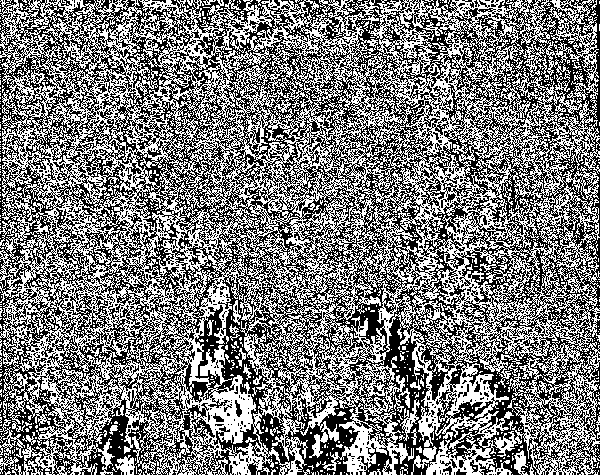

In [247]:
def get_bits(img, channel=0, bitnum=-1):
    bits = np.unpackbits(img[:, :, channel])
    bits = bits.reshape((img.shape[0], img.shape[1], 8))    
    return bits[:, :, bitnum]

img = Image.fromarray(get_bits(img_original, 0, 5) * 255)
img

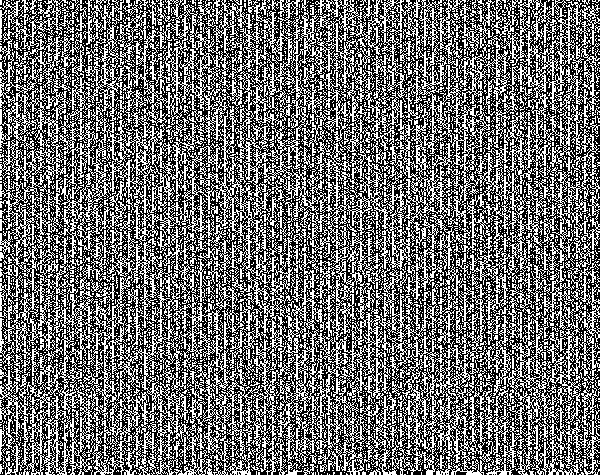

In [248]:
img = Image.fromarray(get_bits(img_encoded, 0, 5) * 255)
img

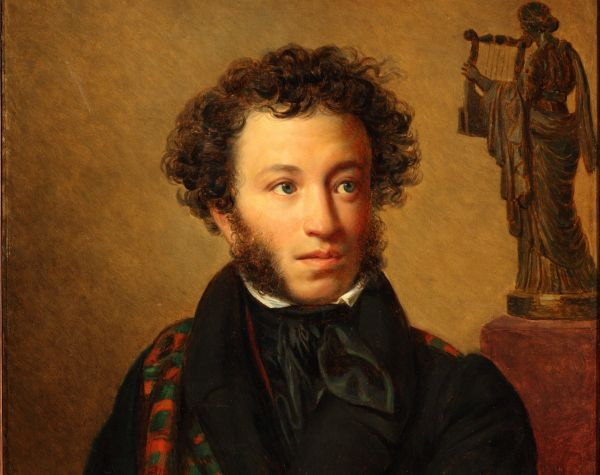

In [249]:
Image.fromarray(img_original[:,:,::-1], 'RGB')

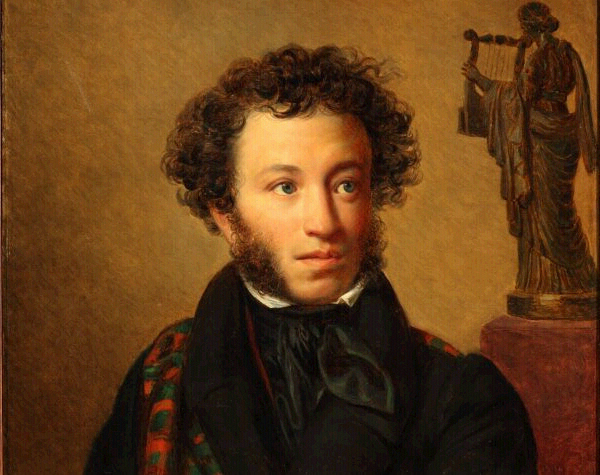

In [250]:
Image.fromarray(img_encoded[:,:,::-1], 'RGB')